In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\pawan\\Downloads\\Python\\Decision Tree\\Heart Disease Prediction\\Dataset'

In [3]:
data = pd.read_csv("HeartDisease.csv")

<IPython.core.display.Javascript object>

In [4]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
data.shape

(303, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Correlational matrix
cor  = data.corr()
cor

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

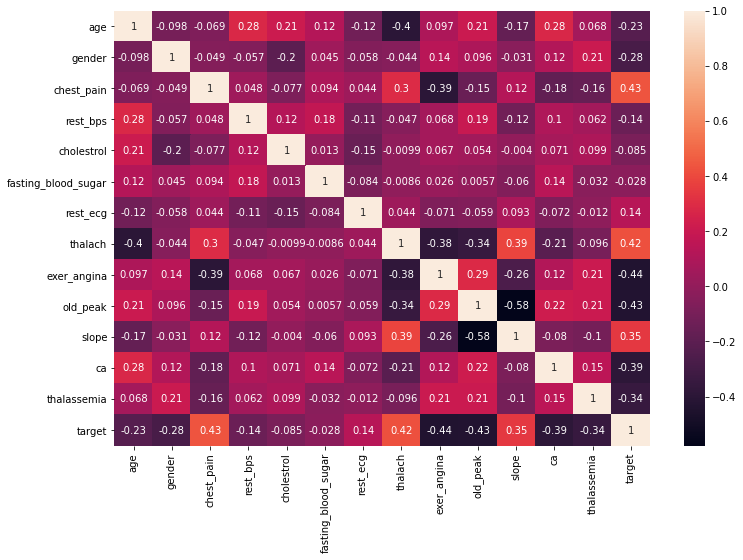

In [10]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

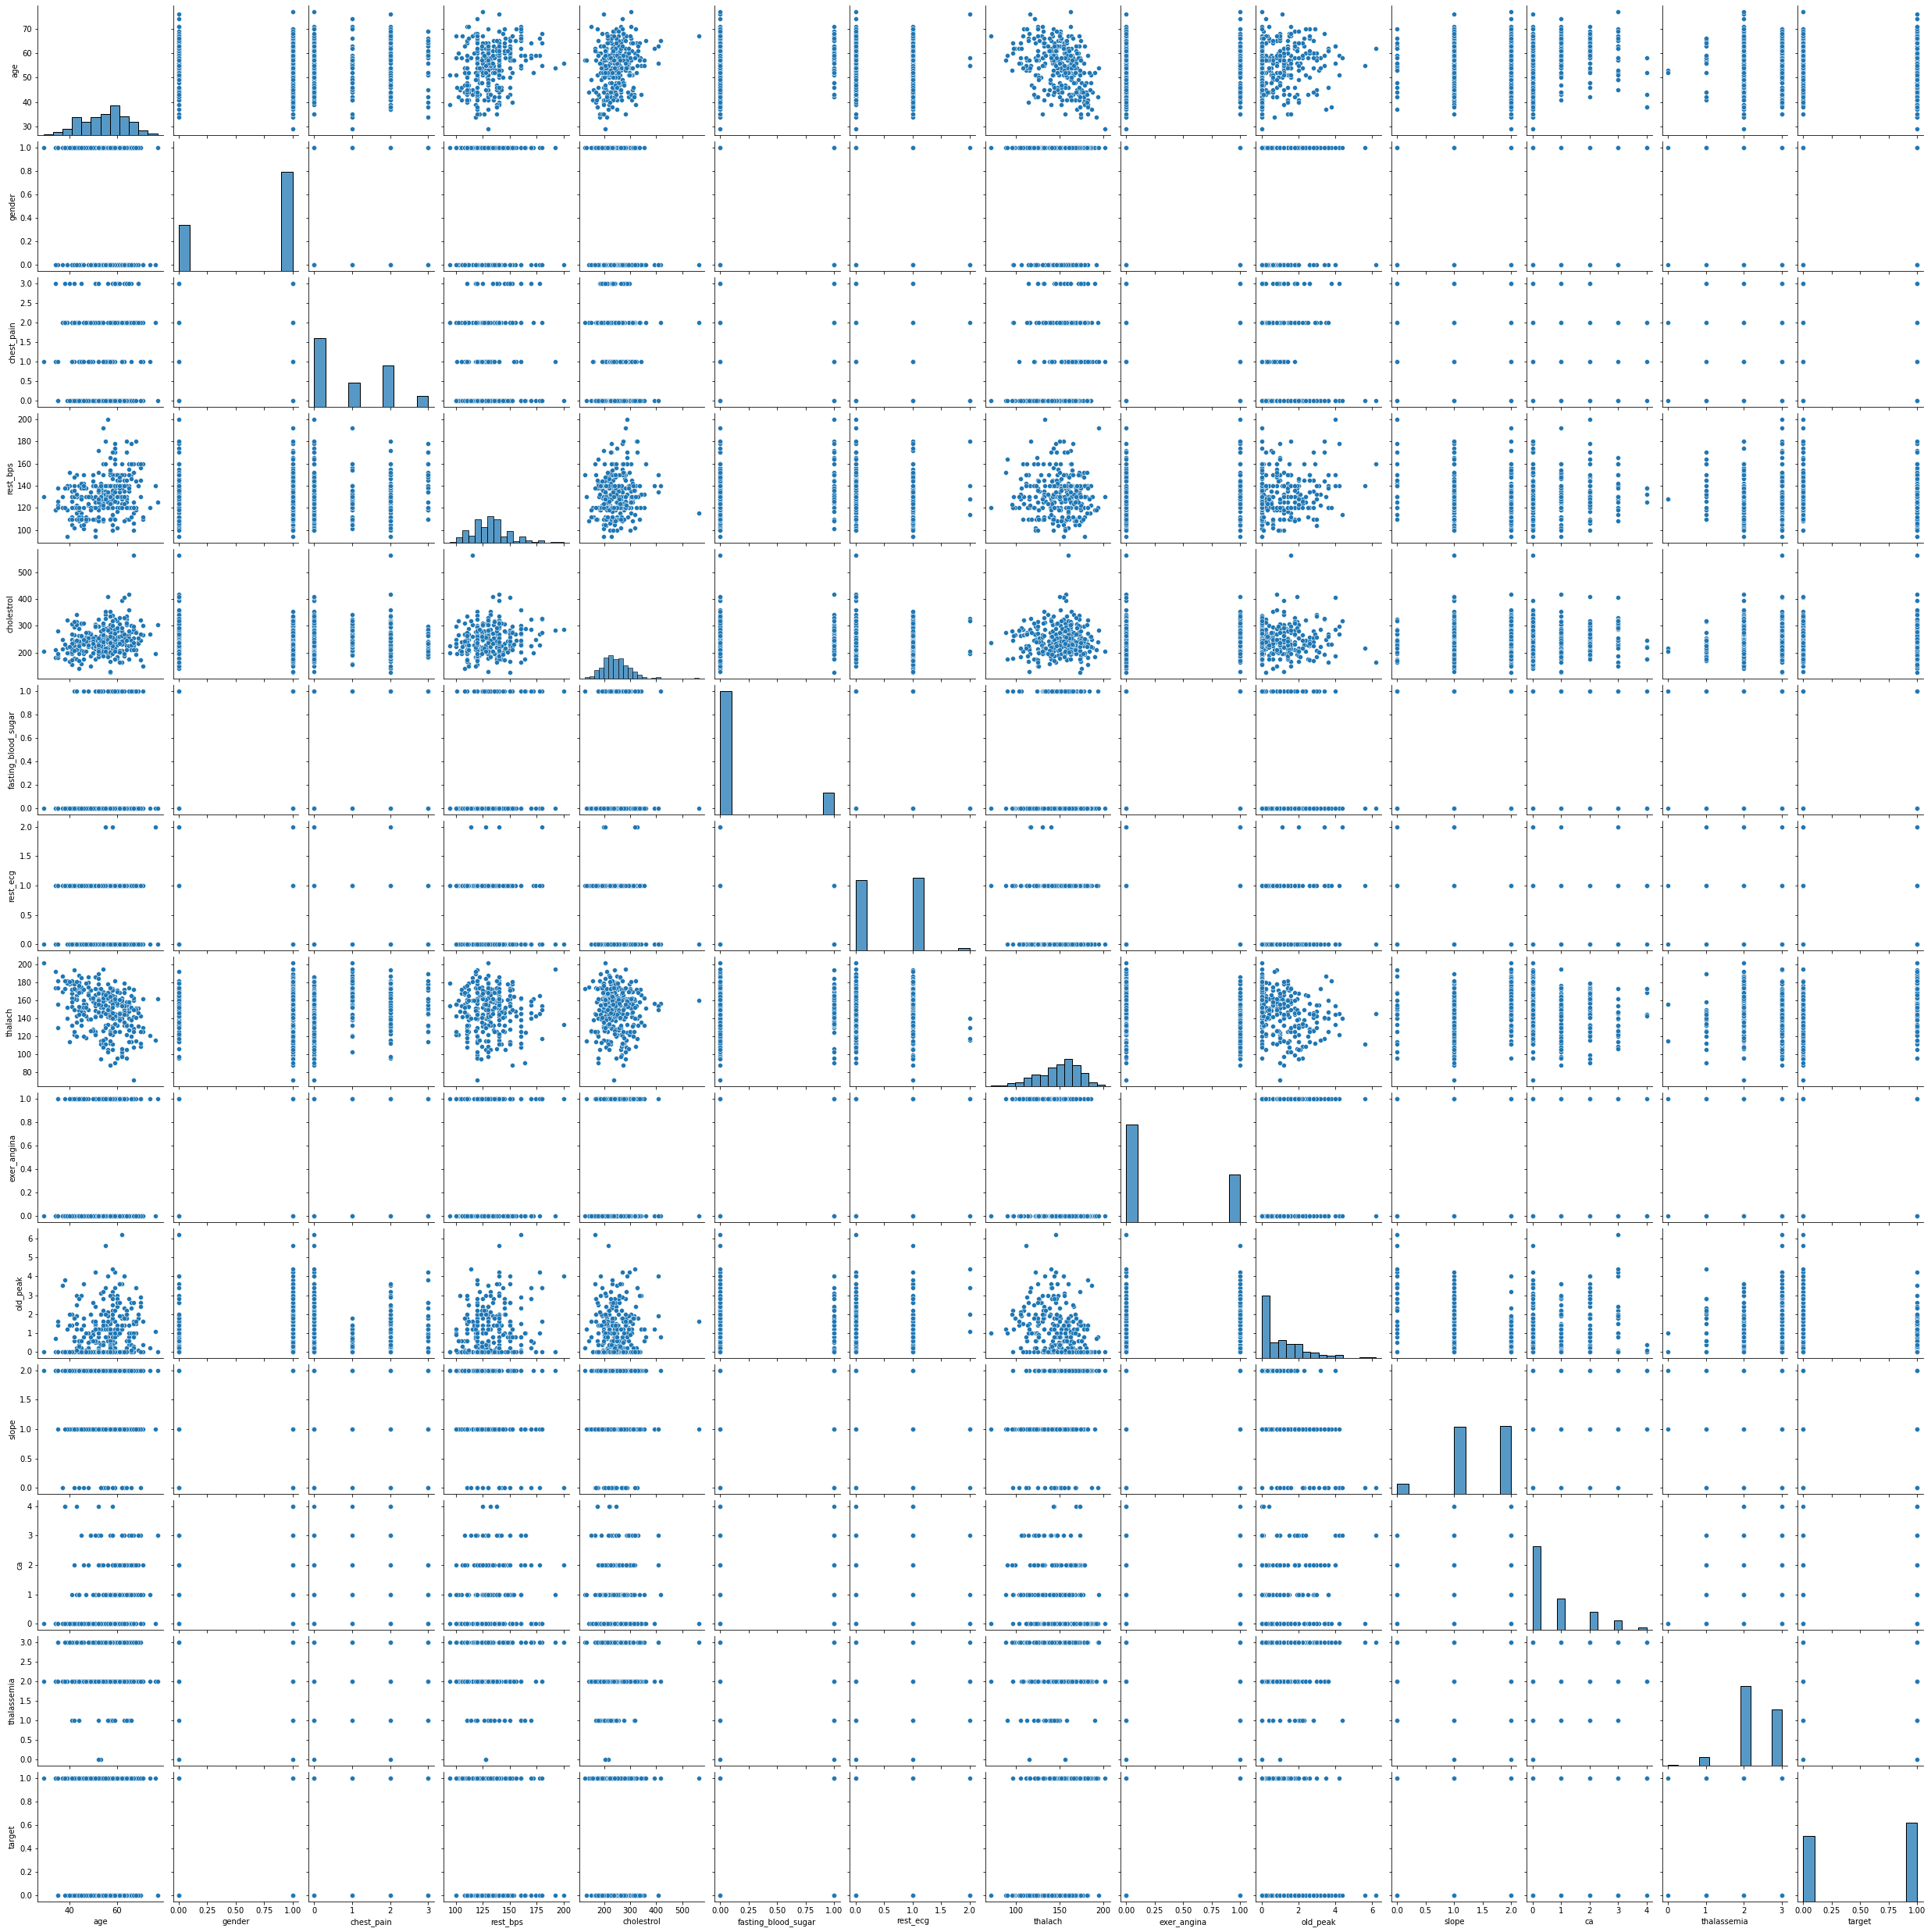

In [11]:
# pairplot
sns.pairplot(data)
plt.show()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='rest_bps', ylabel='age'>

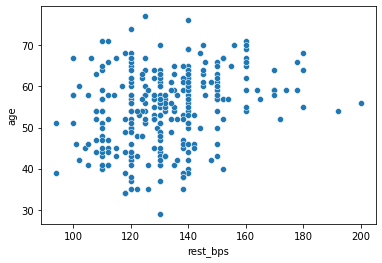

In [35]:
#Scatter plot
sns.scatterplot(x='rest_bps', y='age', data=data)
    

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ca', ylabel='age'>

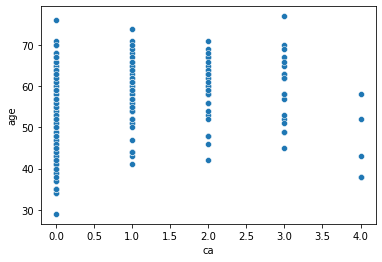

In [36]:
sns.scatterplot(x='ca',y='age', data=data)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='thalach', ylabel='age'>

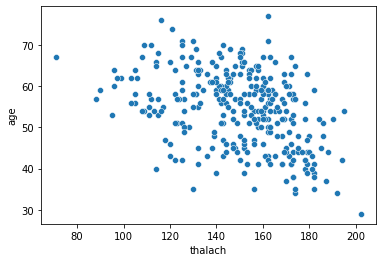

In [37]:
sns.scatterplot(x='thalach',y='age', data=data)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='old_peak', ylabel='age'>

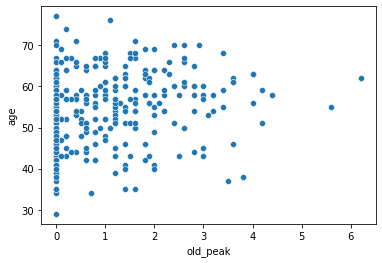

In [39]:
sns.scatterplot(x='old_peak',y='age', data=data)

In [40]:
# Check for the missing values
data.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [41]:
# Check for outliers
from scipy import stats
z = stats.zscore(data)
print(z)

[[ 0.9521966   0.68100522  1.97312292 ... -0.71442887 -2.14887271
   0.91452919]
 [-1.91531289  0.68100522  1.00257707 ... -0.71442887 -0.51292188
   0.91452919]
 [-1.47415758 -1.46841752  0.03203122 ... -0.71442887 -0.51292188
   0.91452919]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ...  1.24459328  1.12302895
  -1.09345881]
 [ 0.29046364  0.68100522 -0.93851463 ...  0.26508221  1.12302895
  -1.09345881]
 [ 0.29046364 -1.46841752  0.03203122 ...  0.26508221 -0.51292188
  -1.09345881]]


In [42]:
threshold = 3
print(np.where(z>3))

<IPython.core.display.Javascript object>

(array([ 28,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248, 251],
      dtype=int64), array([ 4,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11], dtype=int64))


In [43]:
# Remove the outliers
new_data = data[(z<3).all(axis=1)]
new_data.shape

(290, 14)

In [44]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split

x_data = new_data.drop('target',axis=1)
y_data = new_data['target']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2, random_state=10)

## Logistic regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logit_model = LogisticRegression()

In [48]:
logit_model.fit(x_train,y_train)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_pred = logit_model.predict(x_test)
y_pred[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix

In [51]:
l_score = accuracy_score(y_test,y_pred)
print(l_score)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.8275862068965517
0.7692307692307693
0.967741935483871
0.8172043010752689


<b> Logistic regression Model accuracy is 82.75%</b>

In [52]:
print(confusion_matrix(y_pred,y_test))

[[18  1]
 [ 9 30]]


## Decision tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
#create model object 
dt = DecisionTreeClassifier()

In [55]:
# Fit the model
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_dt = dt.predict(x_test)
y_dt[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [57]:
print("Accuracy of the model:",accuracy_score(y_test,y_dt))
dt_score = accuracy_score(y_test,y_dt)
print("Precision score of the model:",precision_score(y_test,y_dt))
print("Recall score of the model:",recall_score(y_test,y_dt))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_dt))

Accuracy of the model: 0.7586206896551724
Precision score of the model: 0.7575757575757576
Recall score of the model: 0.8064516129032258
ROC AUC score of the model: 0.7550776583034647


Accuracy of the model is 74.13%.

In [58]:
print(confusion_matrix(y_test,y_dt))

[[19  8]
 [ 6 25]]


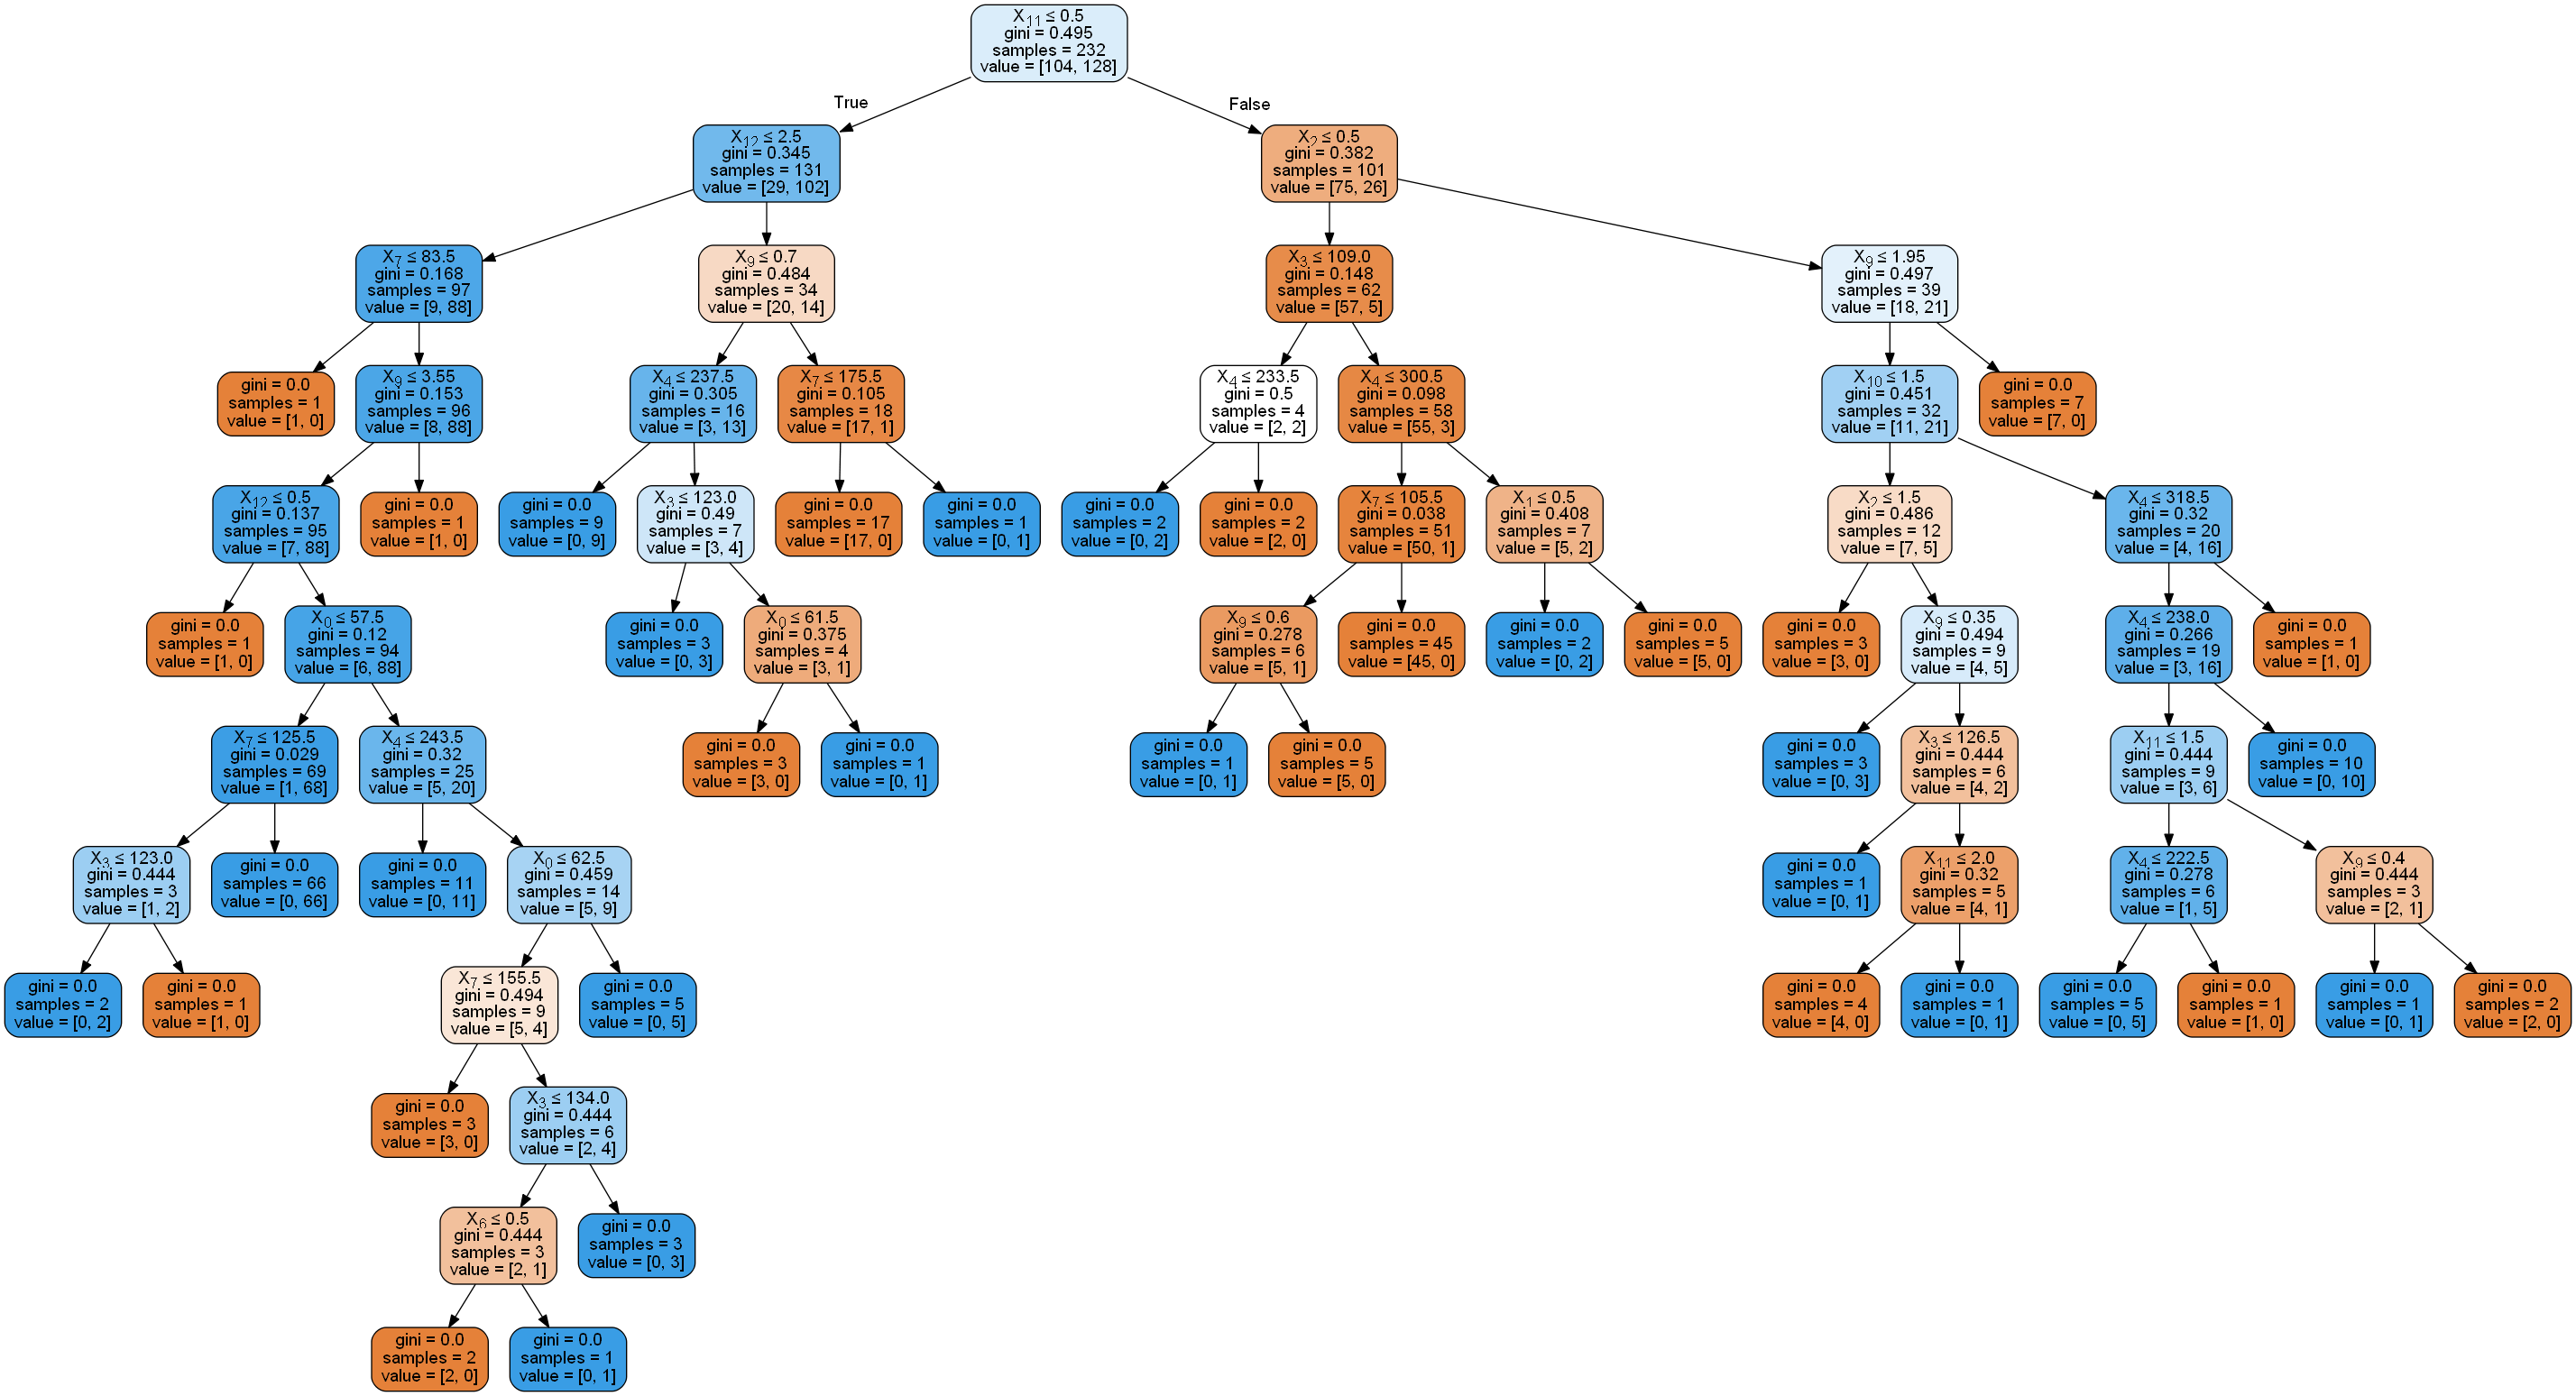

In [59]:
#Plotting tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [60]:
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [61]:
 param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None], 
               'max_features': ['auto', 'log2'], 
               'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [62]:
rfr = RandomForestClassifier()

g_search = GridSearchCV(rfr, param_grid = param_grid,cv = 5)

<IPython.core.display.Javascript object>

In [63]:
g_search.fit(x_train, y_train)

print(g_search.best_params_)

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 7}


C:\Users\pawan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [64]:
DT_tuning = g_search.score(x_test,y_test)
print(DT_tuning*100,'%')

77.58620689655173 %


## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()

In [67]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [68]:
y_rf = rf.predict(x_test)
y_rf[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [69]:
print("Accuracy of the model:",accuracy_score(y_test,y_rf))
rf_score = accuracy_score(y_test,y_rf)
print("Precision score of the model:",precision_score(y_test,y_rf))
print("Recall score of the model:",recall_score(y_test,y_rf))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_rf))

Accuracy of the model: 0.7931034482758621
Precision score of the model: 0.7435897435897436
Recall score of the model: 0.9354838709677419
ROC AUC score of the model: 0.7825567502986859


In [70]:
print(confusion_matrix(y_test,y_rf))

[[17 10]
 [ 2 29]]


##### Model Accuracy is 79.31%.

In [71]:
# Hyperparameter tunig using grid search
# use a full grid of mentioned parameter
param_grid = {"max_depth": [3,None],
              "max_features": [1,3,10],
              "min_samples_split": [2,3,10],
              "bootstrap": [True,False],
              "criterion": ['gini','entropy']}

In [72]:
# RUn grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)

In [73]:
from time import time
start = time()
grid_search.fit(x_train,y_train)
print("GridsearchCV took %.2f seconds for %d candidate parameter setting." %(time()-start, len(grid_search.cv_results_['params'])))

GridsearchCV took 51.79 seconds for 72 candidate parameter setting.


In [74]:
grid_search.cv_results_

{'mean_fit_time': array([0.1007247 , 0.10074039, 0.14461884, 0.18011785, 0.10531893,
        0.10352859, 0.1563746 , 0.19188042, 0.11010604, 0.10511384,
        0.15538387, 0.17034402, 0.10830431, 0.1095017 , 0.14640722,
        0.22598825, 0.17393389, 0.21661506, 0.15318241, 0.10651507,
        0.1073029 , 0.17912645, 0.15657983, 0.10613256, 0.11728625,
        0.19825797, 0.14879012, 0.11010385, 0.11130834, 0.18330884,
        0.14441509, 0.11469312, 0.13404179, 0.21801624, 0.1631639 ,
        0.15558405, 0.13543949, 0.11489196, 0.078585  , 0.08257923,
        0.08337688, 0.128264  , 0.15437183, 0.08876181, 0.09355507,
        0.09554486, 0.14423475, 0.12825561, 0.08616905, 0.09674115,
        0.10372825, 0.18610148, 0.118471  , 0.10352278, 0.0781908 ,
        0.11948023, 0.13443961, 0.09116092, 0.08217521, 0.09036007,
        0.2353724 , 0.12426167, 0.09893045, 0.08676262, 0.1314496 ,
        0.1446188 , 0.09434767, 0.09354401, 0.08835874, 0.18989248,
        0.14779849, 0.10991049]

In [75]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 3,
 'min_samples_split': 10}

In [76]:
# Now lets run the best parameter settings from the grid to build random forest model
rf_grid_search = RandomForestClassifier(n_estimators=15, bootstrap=False, criterion='gini',max_features=3,min_samples_split=3)

In [77]:
# fit the model
rf_grid_search.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=3,
                       n_estimators=15)

In [78]:
y_pred_rf = rf_grid_search.predict(x_test)

In [79]:
print("Accuracy using grid search rf:",accuracy_score(y_test,y_pred_rf))
print("Precision using grid search rf:",precision_score(y_test,y_pred_rf))
print("Recall using grid search rf:",recall_score(y_test,y_pred_rf))
print("ROC AUC using grid search rf:",roc_auc_score(y_test,y_pred_rf))

Accuracy using grid search rf: 0.7931034482758621
Precision using grid search rf: 0.7714285714285715
Recall using grid search rf: 0.8709677419354839
ROC AUC using grid search rf: 0.7873357228195939


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Feature Importance(MDI)')

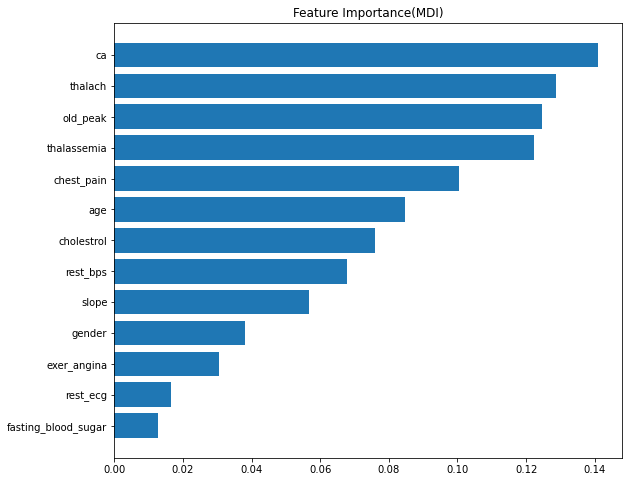

In [80]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) +.5
fig = plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,np.array(new_data.columns)[sorted_idx])
plt.title("Feature Importance(MDI)")

## KNN

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
sc.fit(x_train,y_train)

StandardScaler()

In [84]:
x_tr_sc = sc.transform(x_train)
x_te_sc = sc.transform(x_test)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier(n_neighbors=4)

In [87]:
knn.fit(x_tr_sc,y_train)

KNeighborsClassifier(n_neighbors=4)

In [88]:
y_pred_knn = knn.predict(x_te_sc)
y_pred_knn[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [89]:
print("Accuracy of the model:",accuracy_score(y_test,y_pred_knn))
print("Precision score of the model:",precision_score(y_test,y_pred_knn))
print("Recall score of the model:",recall_score(y_test,y_pred_knn))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_pred_knn))

Accuracy of the model: 0.8275862068965517
Precision score of the model: 0.8620689655172413
Recall score of the model: 0.8064516129032258
ROC AUC score of the model: 0.8291517323775388


In [90]:
print(confusion_matrix(y_test, y_pred_knn))

[[23  4]
 [ 6 25]]


In [91]:
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr_sc,y_train)
    pred_i = knn.predict(x_te_sc)
    error.append(np.mean(pred_i != y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'mean error')

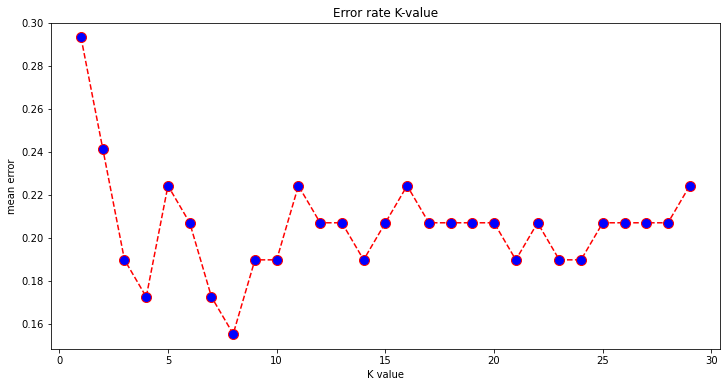

In [92]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Error rate K-value")
plt.xlabel("K value")
plt.ylabel("mean error")

<b> The optimal value for k is 8. </b>

In [93]:
knn1 = KNeighborsClassifier(n_neighbors=8)

In [94]:
knn1.fit(x_tr_sc,y_train)

KNeighborsClassifier(n_neighbors=8)

In [95]:
y_pr_knn1 = knn1.predict(x_te_sc)
y_pr_knn1[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [96]:
print("Accuracy of the model:",accuracy_score(y_test,y_pr_knn1))
knn_score = accuracy_score(y_test,y_pr_knn1)
print("Precision score of the model:",precision_score(y_test,y_pr_knn1))
print("Recall score of the model:",recall_score(y_test,y_pr_knn1))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_pr_knn1))

Accuracy of the model: 0.8448275862068966
Precision score of the model: 0.8235294117647058
Recall score of the model: 0.9032258064516129
ROC AUC score of the model: 0.8405017921146953


For the optimul value of k, the accuracy score is improved from 82% to 84%. 

In [97]:
print(confusion_matrix(y_test,y_pr_knn1))

[[21  6]
 [ 3 28]]


## Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [102]:
used_features = new_data.drop(['gender','rest_ecg','fasting_blood_sugar'],axis=1).columns

In [16]:
gnb = GaussianNB()

In [103]:
gnb.fit(x_train,y_train)

GaussianNB()

In [104]:
y_pr_nb = gnb.predict(x_test)
y_pr_nb[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [105]:
#Print results
print('Number of mislabeled points out of total {} points : {}, performance {:05.2f}%'
      .format(y_test.shape[0], (y_test !=y_pr_nb).sum(),
        accuracy_score(y_test,y_pr_nb)*100))

Number of mislabeled points out of total 58 points : 11, performance 81.03%


In [106]:
print("Accuracy of the model:",accuracy_score(y_test,y_pr_nb))
nb_score = accuracy_score(y_test,y_pr_nb)
print("Precision score of the model:",precision_score(y_test,y_pr_nb))
print("Recall score of the model:",recall_score(y_test,y_pr_nb))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_pr_nb))

Accuracy of the model: 0.8103448275862069
Precision score of the model: 0.7941176470588235
Recall score of the model: 0.8709677419354839
ROC AUC score of the model: 0.8058542413381123


Accuracy of the model is 81.03% and good roc_auc score.

In [107]:
print(confusion_matrix(y_test,y_pr_nb))

[[20  7]
 [ 4 27]]


## SVM

In [108]:
from sklearn.svm import SVC

In [109]:
svclassifier = SVC(kernel='linear')

In [110]:
svclassifier.fit(x_train,y_train)

SVC(kernel='linear')

In [111]:
y_pr_svm = svclassifier.predict(x_test)
y_pr_svm[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [112]:
print("Accuracy of the model:",accuracy_score(y_test,y_pr_svm))
svm_score = accuracy_score(y_test,y_pr_svm)
print("Precision score of the model:",precision_score(y_test,y_pr_svm))
print("Recall score of the model:",recall_score(y_test,y_pr_svm))
print("ROC AUC score of the model:",roc_auc_score(y_test,y_pr_svm))

Accuracy of the model: 0.8448275862068966
Precision score of the model: 0.7894736842105263
Recall score of the model: 0.967741935483871
ROC AUC score of the model: 0.8357228195937874


Accuracy of the model is 84.57% and also good roc_auc score.

In [113]:
print(confusion_matrix(y_test,y_pr_svm))

[[19  8]
 [ 1 30]]


In [114]:
# Hyperparameter tunning using Grid search
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01],'kernel': ['rbf']}

In [116]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,n_jobs=1)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01,

GridSearchCV(estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [117]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [118]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


In [119]:
pd.DataFrame({'method':['Logistic regression','Decision Tree','DT with hyperparameter tuning','Random Forest','KNN','Naive Bayes','SVM'], 
              'accuracy': [l_score,dt_score,DT_tuning,rf_score,knn_score,nb_score,svm_score]})

<IPython.core.display.Javascript object>

,method,accuracy
0,Logistic regression,0.827586
1,Decision Tree,0.758621
2,DT with hyperparameter tuning,0.775862
3,Random Forest,0.793103
4,KNN,0.844828
5,Naive Bayes,0.810345
6,SVM,0.844828
